<a href="https://colab.research.google.com/github/ajeetsandela/Credit-Risk-Modelling/blob/main/Credit_Risk_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**`Importing Data to Google Colab**

In [1]:
#Import dataset from Local to Google Colab
from google.colab import files
uploaded=files.upload()

Saving cr_loan2.csv to cr_loan2.csv


In [2]:
#Storig dataset into dataframe and finding its shape
import pandas as panda
import io
credit_dataset=panda.read_csv(io.BytesIO(uploaded['cr_loan2.csv']))
credit_dataset.shape

(32581, 12)

In [3]:
#listing the columns
credit_dataset.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [4]:
#Having a look on data
credit_dataset.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [5]:
#Finding Correlation
credit_dataset.corr()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.173202,0.163106,0.050787,0.012580,-0.021629,-0.042411,0.859133
person_income,0.173202,1.000000,0.134268,0.266820,0.000792,-0.144449,-0.254471,0.117987
person_emp_length,0.163106,0.134268,1.000000,0.113082,-0.056405,-0.082489,-0.054111,0.144699
loan_amnt,0.050787,0.266820,0.113082,1.000000,0.146813,0.105376,0.572612,0.041967
loan_int_rate,0.012580,0.000792,-0.056405,0.146813,1.000000,0.335133,0.120314,0.016696
loan_status,-0.021629,-0.144449,-0.082489,0.105376,0.335133,1.000000,0.379366,-0.015529
loan_percent_income,-0.042411,-0.254471,-0.054111,0.572612,0.120314,0.379366,1.000000,-0.031690
cb_person_cred_hist_length,0.859133,0.117987,0.144699,0.041967,0.016696,-0.015529,-0.031690,1.000000


In [6]:
#Summary statistics
credit_dataset.describe()
#Here we can see some unusality in the statistics  such as person age max is 144,emp length

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


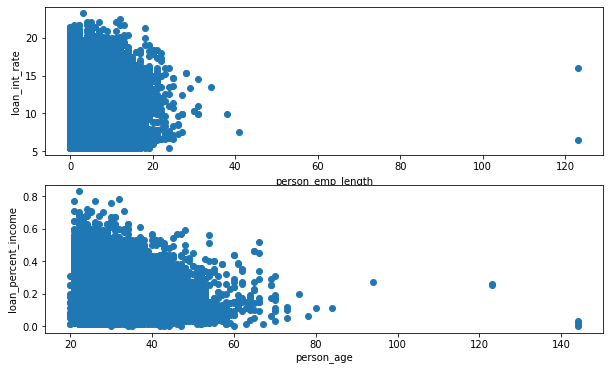

In [7]:
#Detecting Outliers
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, figsize=(10, 6))
ax[0].scatter(x = credit_dataset['person_emp_length'], y = credit_dataset['loan_int_rate'])
ax[0].set_xlabel("person_emp_length")
ax[0].set_ylabel("loan_int_rate")

ax[1].scatter(x = credit_dataset['person_age'], y = credit_dataset['loan_percent_income'])
ax[1].set_xlabel("person_age")
ax[1].set_ylabel("loan_percent_income")

plt.show()

#observations:
#plot 1:  person_emp_length is much high 
#plot2: person age is 140 from scatter plot 
#Now we have to delete those detected outliers


In [8]:
#Removing Outliers from the Dataset
# Create an array of indices where employment length is greater than 60
# Drop the records from the data based on the indices and update in the dataframe
emp_length_indexes = credit_dataset[credit_dataset['person_emp_length'] > 60].index
credit_dataset = credit_dataset.drop(emp_length_indexes)
age_indexes = credit_dataset[credit_dataset['person_age'] > 90].index
credit_dataset = credit_dataset.drop(age_indexes)

#shape of the dataset
credit_dataset.shape

#observations
#dataset with outliers=32581
#dataset without outliers=32573

(32573, 12)

In [9]:
#Identifying Null Values
print(credit_dataset.columns[credit_dataset.isnull().any()])
credit_dataset.isnull().sum()

Index(['person_emp_length', 'loan_int_rate'], dtype='object')


person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3114
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [10]:
#Imputing missing values
credit_dataset['person_emp_length'].fillna((credit_dataset['person_emp_length'].median()),inplace=True)

#removing loan_int_rate missing values
# Store the array on indices
indexes = credit_dataset[credit_dataset['loan_int_rate'].isnull()].index

# Save the new data without missing data
credit_dataset = credit_dataset.drop(indexes)

In [11]:
#Checking of any existing missing values
credit_dataset.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [12]:
#Data types
credit_dataset.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [13]:
#Separate Numerical and Non-Numerical columns and perform one-hot encoding to the non numerical columns later concatenate it 

# Create two data sets for numeric and non-numeric data
credit_numerical = credit_dataset.select_dtypes(exclude=['object'])
credit_str = credit_dataset.select_dtypes(include=['object'])

# One-hot encode the non-numeric columns
credit_str_onehot = panda.get_dummies(credit_str)

# Union the one-hot encoded columns to the numeric ones
credit_dataset_new = panda.concat([credit_numerical,credit_str_onehot], axis=1)

# Print the columns in the new data set
print(credit_dataset_new.columns)




Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y'],
      dtype='object')


In [14]:
#Create training and test sets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Create the X and y data sets
X = credit_dataset_new.loc[:, credit_dataset_new.columns != 'loan_status']
y = credit_dataset_new[['loan_status']]

# Use test_train_split to create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.4, random_state=123)

# Create and fit the logistic regression model
logistic_model= LogisticRegression(solver='lbfgs').fit(X_train,np.ravel(y_train))

# Print the models coefficients
print(logistic_model.coef_)


# Create predictions of probability for loan status using test data
predictions= logistic_model.predict_proba(X_test)

# Create dataframes of first five predictions, and first five true labels
predictions_df = panda.DataFrame(predictions[:,1][0:5], columns = ['prob_default'])
true_df = y_test.head()

# Concatenate and print the two data frames for comparison
print(panda.concat([true_df.reset_index(drop = True), predictions_df], axis = 1))


[[-8.03399249e-08 -4.02644411e-05 -3.06686941e-08  1.06277398e-04
   9.26524268e-08  2.51365066e-09 -1.52689687e-08 -7.00873377e-09
   3.30764038e-11 -4.45910979e-09  8.36412419e-09  3.09761861e-09
  -3.24364448e-09  1.71018374e-09  9.22636726e-10 -1.23097177e-09
  -4.32646578e-09 -1.17213420e-08 -6.49818525e-09 -1.54629589e-09
   1.15270553e-08  3.68430630e-09  1.03724268e-09  4.46575918e-10
  -1.06744089e-08  7.60376589e-09]]
   loan_status  prob_default
0            1      0.445779
1            1      0.223447
2            0      0.288558
3            0      0.169358
4            1      0.114182


In [15]:
#Credit Model performance
logistic_model.score(X_test,y_test)

#observation
# 80.2% values for loan_status  predicted correctly

0.8025288526816021